In [9]:
%pylab inline
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

Populating the interactive namespace from numpy and matplotlib


In [19]:
# Data preparation
X = df[['TotalSF']] # pandas DataFrame
y = df[["SalePrice"]] # pandas Series

#X use to be Capital and y lower case

In [20]:
X

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343
...,...
1455,2600
1456,3615
1457,3492
1458,2156


In [21]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [18]:
df.shape

(1455, 82)

In [22]:
# 1. Load the library
from sklearn.linear_model import LinearRegression

In [23]:
# 2. Create an instance
reg = LinearRegression()

In [24]:
# 3. Train the model
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# 4. Predice
reg.predict([ [1000],[3000] ])

array([[ 50217.33439988],
       [217799.90852957]])

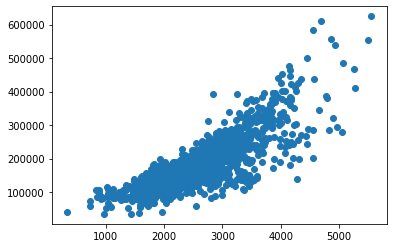

In [27]:
plt.scatter(X,y)

In [30]:
x_hip = np.linspace(500, 6000)
x_hip

array([ 500.        ,  612.24489796,  724.48979592,  836.73469388,
        948.97959184, 1061.2244898 , 1173.46938776, 1285.71428571,
       1397.95918367, 1510.20408163, 1622.44897959, 1734.69387755,
       1846.93877551, 1959.18367347, 2071.42857143, 2183.67346939,
       2295.91836735, 2408.16326531, 2520.40816327, 2632.65306122,
       2744.89795918, 2857.14285714, 2969.3877551 , 3081.63265306,
       3193.87755102, 3306.12244898, 3418.36734694, 3530.6122449 ,
       3642.85714286, 3755.10204082, 3867.34693878, 3979.59183673,
       4091.83673469, 4204.08163265, 4316.32653061, 4428.57142857,
       4540.81632653, 4653.06122449, 4765.30612245, 4877.55102041,
       4989.79591837, 5102.04081633, 5214.28571429, 5326.53061224,
       5438.7755102 , 5551.02040816, 5663.26530612, 5775.51020408,
       5887.75510204, 6000.        ])

In [33]:
predictions = reg.predict(pd.DataFrame(x_hip))

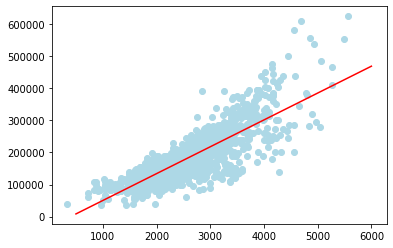

In [46]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, predictions, c='red')

In [43]:
reg.coef_

array([[83.79128706]])

In [45]:
reg.intercept_

array([-33573.95266496])

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [51]:
len(X_test)

146

In [56]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
predictions = reg.predict(X_test)

In [58]:
predictions[:5]

array([[114528.4941373 ],
       [145943.76160392],
       [143380.93715269],
       [ 45662.92098022],
       [236634.67847465]])

In [59]:
y_test[:5]

,SalePrice
498,130000
1265,183900
411,145000
1049,84900
1036,315500


In [ ]:
__MAE__ is the sum of the absolute values of the error
__MAPE__ is almost the same but gives te percentage of the absolute value of error


__MAE__ is the sum of the absolute values of the error

__MAPE__ is almost the same but gives te percentage of the absolute value of error


In [60]:
from sklearn.metrics import mean_absolute_error

In [62]:
mean_absolute_error(reg.predict(X_test), y_test)

33687.645424627175

In [66]:
np.mean(np.abs(reg.predict(X_test) - y_test) / y_test)
# in percent

SalePrice    0.198735
dtype: float64

In [67]:
# 1. Load 
from sklearn.neighbors import KNeighborsRegressor

In [102]:
# 2. Create an instance
reg = KNeighborsRegressor(n_neighbors=20)

In [103]:
# 3. Fit
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [104]:
mean_absolute_error(reg.predict(X_test), y_test)

32529.082876712328

In [105]:
np.mean(np.abs(reg.predict(X_test) - y_test) / y_test)


SalePrice    0.188206
dtype: float64

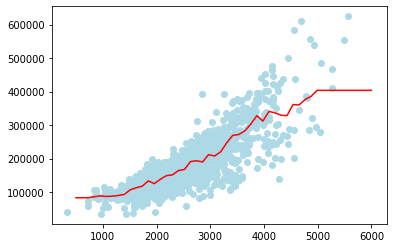

In [106]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')

In [108]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(reg.predict(X_test), y_test))

47509.98980238081

In [110]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
regk = KNeighborsRegressor(n_neighbors=5)

from sklearn.model_selection import cross_val_score


In [114]:
# We calculate the metric for several subsets (determined by cv)
# With cv=5, we will have 5 results from 5 training/test

cross_val_score(reg1,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31053.225860573915

In [115]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-32105.07298969072

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-2.10428352e+09, -2.10428352e+09, -2.10428352e+09, -2.10428352e+09,
        -2.10428352e+09, -2.10428352e+09, -2.10428352e+09, -2.10428352e+09,
        -2.10428352e+09, -2.10428352e+09, -2.10428352e+09]),
 <a list of 10 Patch objects>)

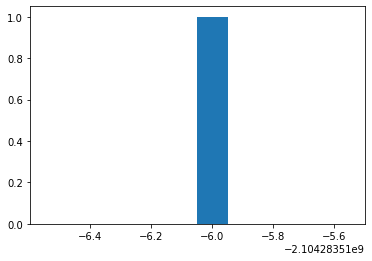

In [118]:
res = cross_val_score(regk,X,y,cv=10,scoring="neg_mean_squared_error").mean()
plt.hist(res)

In [119]:
# Import library
from sklearn.tree import DecisionTreeRegressor 

In [122]:
# Create an instance
regd = DecisionTreeRegressor(max_depth=6)


In [137]:
# Train the model
regd.fit(X,y)

cross_val_score(regd,X,y,cv=5,scoring='neg_mean_squared_error').mean()

-2278720398.505788

In [138]:
def corr(preds,real):
  return np.corrcoef(preds,real)[0][1]


In [139]:
corr(regd.predict(X_test),y_test)

ValueError: ignored

In [149]:
#Exercise 1
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"max_depth":np.arange(3,10)})

reg.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

In [150]:
reg.best_estimator_


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

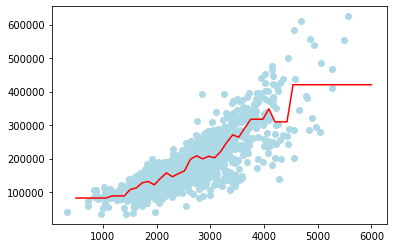

In [161]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')

In [159]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"min_samples_leaf":np.arange(20,1000,100)})
reg.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920])},
             pre_dispatch='2*n_jobs', refit=Tru

In [160]:
reg.best_estimator_


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

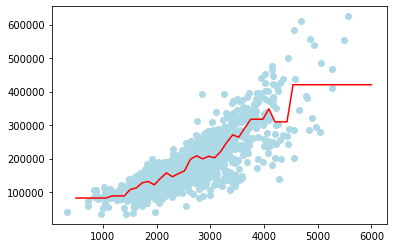

In [162]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')

In [164]:
#For unknown cases, linear regression offers better predictions than decision trees, 
#because the latter shows constant values in those cases (see up)

In [165]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"min_samples_leaf":np.arange(20,1000,100),
                                                        "max_depth": np.arange(3,10)})
reg.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 62

In [166]:
reg.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

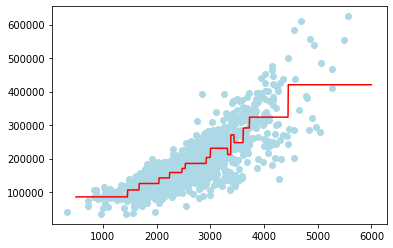

In [168]:
x_hip = np.linspace(500,6000,1000)
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')